This is for research question 3.

What role do key personnel (actors and directors) play in shaping a movie's ending?

Do certain actors or directors have a preference for particular types of endings, and do their choices influence the overall predictability of a movie’s outcome?

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pickle

# path
DATA_FOLDER = 'Data/MovieSummaries/'
MOVIE_DATASET = DATA_FOLDER + 'movies_dataset_cleaned.tsv'

# Dataset loading
movies = pd.read_csv(MOVIE_DATASET, sep='\t')


In [8]:
movies.head()

,Wikipedia movie ID,Freebase movie ID,Movie name,Movie release date,Movie runtime,Movie languages (Freebase ID:name tuples),Movie countries (Freebase ID:name tuples),Movie genres (Freebase ID:name tuples),Release year,Movie genres,Movie languages,Movie countries,Score
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",2001,"Thriller, Science Fiction, Horror, Adventure, ...",English Language,United States of America,3.0
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp...",2000,"Mystery, Biographical film, Drama, Crime Drama",English Language,United States of America,5.0
2,13696889,/m/03cfc81,The Gangsters,1913-05-29,35.0,"{""/m/06ppq"": ""Silent film"", ""/m/02h40lc"": ""Eng...","{""/m/09c7w0"": ""United States of America""}","{""/m/02hmvc"": ""Short Film"", ""/m/06ppq"": ""Silen...",1913,"Short Film, Silent film, Indie, Black-and-whit...","Silent film, English Language",United States of America,3.0
3,10408933,/m/02qc0j7,Alexander's Ragtime Band,1938-08-16,106.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/04t36"": ""Musical"", ""/m/01z4y"": ""Comedy"", ...",1938,"Musical, Comedy, Black-and-white",English Language,United States of America,4.0
4,6631279,/m/0gffwj,Little city,1997-04-04,93.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/06cvj"": ""Romantic comedy"", ""/m/0hj3n0w"": ...",1997,"Romantic comedy, Ensemble Film, Comedy-drama, ...",English Language,United States of America,4.0


In [9]:
with open('Data/MovieSummaries/movie_data_from_tmdb.pkl', 'rb') as file:
    movie_data_from_tmdb = pickle.load(file)

In [16]:
# add director to the dataset
def find_director(movie_data_from_tmdb_single):
    try:
        crew = movie_data_from_tmdb_single['credits']['crew']
    except KeyError:
        return pd.NA
    for person in crew:
        if person['job'] == 'Director':
            return person['name']
    return pd.NA

movies['director'] = movies['Wikipedia movie ID'].map(lambda x: find_director(movie_data_from_tmdb[x]) if x in movie_data_from_tmdb else pd.NA)

In [41]:
# add vote average and revenue to the dataset
def find_vote_average(movie_data_from_tmdb_single):
    try:
        return movie_data_from_tmdb_single['details']['vote_average']
    except KeyError:
        return pd.NA

def find_revenue(movie_data_from_tmdb_single):
    try:
        return movie_data_from_tmdb_single['details']['revenue']
    except KeyError:
        return pd.NA

movies['vote_average'] = movies['Wikipedia movie ID'].map(lambda x: find_vote_average(movie_data_from_tmdb[x]) if x in movie_data_from_tmdb else pd.NA)
movies['revenue'] = movies['Wikipedia movie ID'].map(lambda x: find_revenue(movie_data_from_tmdb[x]) if x in movie_data_from_tmdb else pd.NA)

In [44]:
movies.head()

,Wikipedia movie ID,Freebase movie ID,Movie name,Movie release date,Movie runtime,Movie languages (Freebase ID:name tuples),Movie countries (Freebase ID:name tuples),Movie genres (Freebase ID:name tuples),Release year,Movie genres,Movie languages,Movie countries,Score,director,vote_average,revenue
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",2001,"Thriller, Science Fiction, Horror, Adventure, ...",English Language,United States of America,3.0,John Carpenter,5.1,14010832
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp...",2000,"Mystery, Biographical film, Drama, Crime Drama",English Language,United States of America,5.0,Edward Lucas,8.0,0
2,13696889,/m/03cfc81,The Gangsters,1913-05-29,35.0,"{""/m/06ppq"": ""Silent film"", ""/m/02h40lc"": ""Eng...","{""/m/09c7w0"": ""United States of America""}","{""/m/02hmvc"": ""Short Film"", ""/m/06ppq"": ""Silen...",1913,"Short Film, Silent film, Indie, Black-and-whit...","Silent film, English Language",United States of America,3.0,Henry Lehrman,6.0,0
3,10408933,/m/02qc0j7,Alexander's Ragtime Band,1938-08-16,106.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/04t36"": ""Musical"", ""/m/01z4y"": ""Comedy"", ...",1938,"Musical, Comedy, Black-and-white",English Language,United States of America,4.0,Henry King,6.6,4000000
4,6631279,/m/0gffwj,Little city,1997-04-04,93.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/06cvj"": ""Romantic comedy"", ""/m/0hj3n0w"": ...",1997,"Romantic comedy, Ensemble Film, Comedy-drama, ...",English Language,United States of America,4.0,Hervé Palud,6.0,0


In [45]:
# drop movies without director
movies_filtered = movies.dropna(subset=['director'])

# drop movies without vote average or revenue
movies_filtered = movies_filtered.dropna(subset=['vote_average', 'revenue'])

# drop movies with revenue less than 1000
movies_filtered = movies_filtered[movies_filtered['revenue'] > 1000]

In [46]:
# count the number of movies per director
director_counts = movies_filtered['director'].value_counts()
director_counts

director
Clint Eastwood      32
Steven Spielberg    32
Brian De Palma      28
Joel Schumacher     27
Woody Allen         26
                    ..
Edward Laemmle       1
Keita Kono           1
H. C. Potter         1
Adam Rapp            1
Trần Anh Hùng        1
Name: count, Length: 3481, dtype: int64

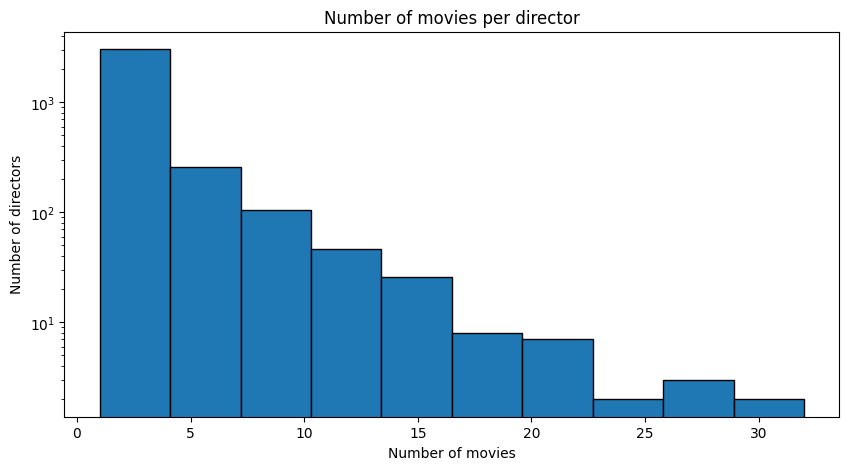

In [47]:
# plot the number of movies per director
plt.figure(figsize=(10, 5))
plt.hist(director_counts, edgecolor='black', log=True)
plt.xlabel('Number of movies')
plt.ylabel('Number of directors')
plt.title('Number of movies per director')
plt.show()

In [48]:
# filter out directors with more than 4 movies
directors = director_counts[director_counts > 4].index
movies_filtered = movies_filtered[movies_filtered['director'].isin(directors)]

# count the number of movies per director
director_counts_filtered = movies_filtered['director'].value_counts()
director_counts_filtered

director
Steven Spielberg    32
Clint Eastwood      32
Brian De Palma      28
Joel Schumacher     27
Woody Allen         26
                    ..
Sofia Coppola        5
Richard Eyre         5
Steven Brill         5
Michael Moore        5
Andrew Bergman       5
Name: count, Length: 457, dtype: int64

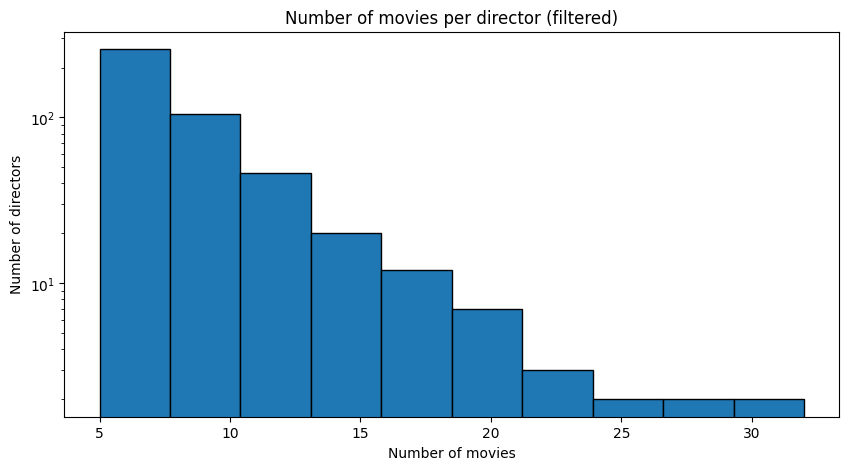

In [49]:
# plot the number of movies per director
plt.figure(figsize=(10, 5))
plt.hist(director_counts_filtered, edgecolor='black', log=True)
plt.xlabel('Number of movies')
plt.ylabel('Number of directors')
plt.title('Number of movies per director (filtered)')
plt.show()

In [50]:
# count the number of movies per director, separated by the score of the movie
director_counts_filtered_score = movies_filtered.groupby(['director', 'Score']).size()
director_counts_filtered_score

director       Score
Abel Ferrara   3.0      2
               4.0      1
Adam McKay     3.0      2
               4.0      1
Adam Shankman  3.0      1
                       ..
Zack Snyder    3.0      2
Zhang Yimou    3.0      4
               4.0      1
Éric Toledano  3.0      2
               4.0      2
Length: 952, dtype: int64

In [51]:
# calculate the average score per director, and sort the directors by score
director_avg_score = movies_filtered.groupby('director')['Score'].mean()
director_avg_score = director_avg_score.sort_values(ascending=False)
director_avg_score

director
David Wain             5.000000
Michael Hoffman        4.500000
Lana Wachowski         4.500000
Andrew Bergman         4.333333
David Koepp            4.333333
                         ...   
Joan Micklin Silver         NaN
Joe Dante                   NaN
Joe Russo                   NaN
Nick Cassavetes             NaN
Terence Young               NaN
Name: Score, Length: 457, dtype: float64

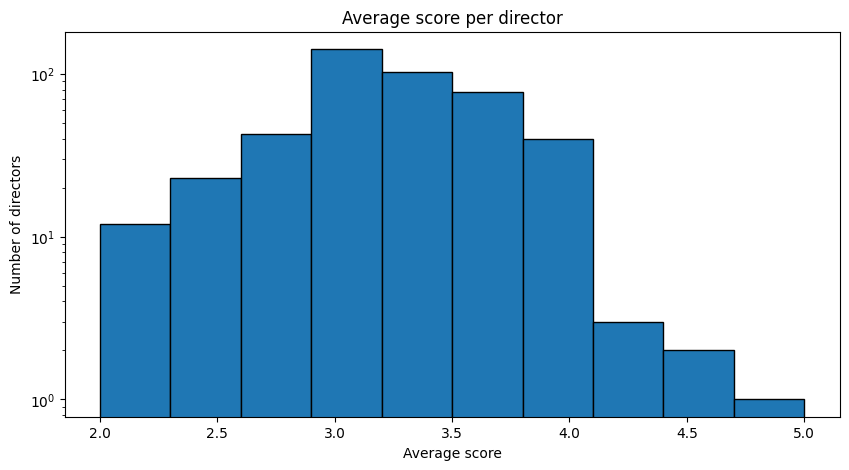

In [52]:
# plot the average score per director
plt.figure(figsize=(10, 5))
plt.hist(director_avg_score, edgecolor='black', log=True)
plt.xlabel('Average score')
plt.ylabel('Number of directors')
plt.title('Average score per director')
plt.show()


In [82]:
# calculate the score variance per director, and sort the directors by variance
director_score_variance = movies_filtered.groupby('director')['Score'].var()
director_score_variance = director_score_variance.sort_values(ascending=False)
director_score_variance

director
Robert Wise        3.000000
Priyadarshan       2.333333
Antoine Fuqua      2.333333
Doug Liman         2.333333
David S. Ward      2.333333
                     ...   
Takashi Shimizu         NaN
Taylor Hackford         NaN
Terence Young           NaN
Tim Story               NaN
Tobe Hooper             NaN
Name: Score, Length: 457, dtype: float64

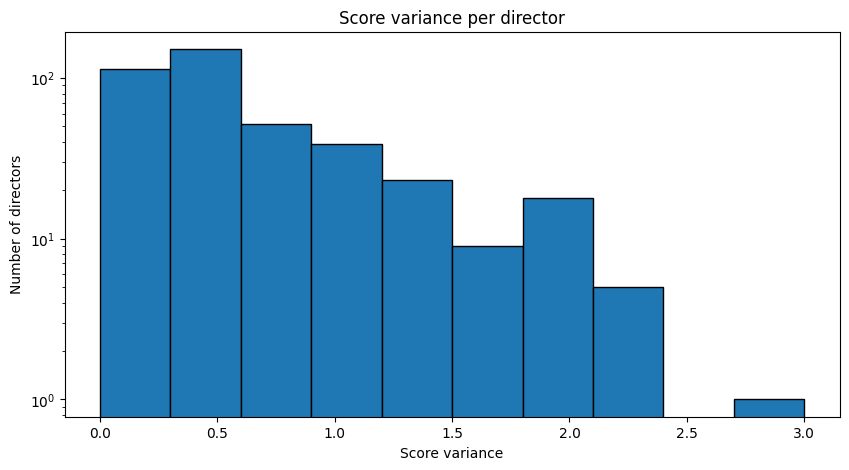

In [83]:
# plot the score variance per director
plt.figure(figsize=(10, 5))
plt.hist(director_score_variance, edgecolor='black', log=True)
plt.xlabel('Score variance')
plt.ylabel('Number of directors')
plt.title('Score variance per director')
plt.show()

In [53]:
# calculate the average revenue per director, and sort the directors by revenue
director_avg_revenue = movies_filtered.groupby('director')['revenue'].mean()
director_avg_revenue = director_avg_revenue.sort_values(ascending=False)
director_avg_revenue

director
Joss Whedon             1222826304.8
James Cameron           1111498680.0
Joe Russo               1066990447.2
Chris Renaud             715131603.8
Bill Condon         663223935.555556
                          ...       
Abel Ferrara               1168165.4
Gaspar Noé             995173.909091
Tod Browning                787500.0
Gregg Araki                 658715.8
David Hugh Jones            603071.8
Name: revenue, Length: 457, dtype: object

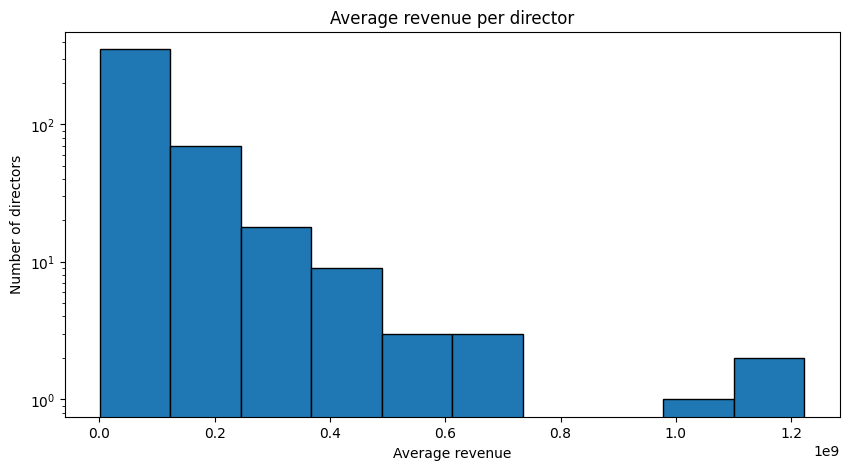

In [54]:
# plot the average revenue per director
plt.figure(figsize=(10, 5))
plt.hist(director_avg_revenue, edgecolor='black', log=True)
plt.xlabel('Average revenue')
plt.ylabel('Number of directors')
plt.title('Average revenue per director')
plt.show()

In [55]:
# calculate the average vote average per director, and sort the directors by vote average
director_avg_vote_average = movies_filtered.groupby('director')['vote_average'].mean()
director_avg_vote_average = director_avg_vote_average.sort_values(ascending=False)
director_avg_vote_average

director
Alexandre de La Patellière       8.281
Sergio Leone                  8.260333
Hayao Miyazaki                8.019222
Stanley Kubrick                  7.919
Frank Darabont                     7.9
                                ...   
Andrew Bergman                   5.485
Anees Bazmee                       5.3
Mark Griffiths                    4.88
James Toback                  4.717143
Uwe Boll                      3.842857
Name: vote_average, Length: 457, dtype: object

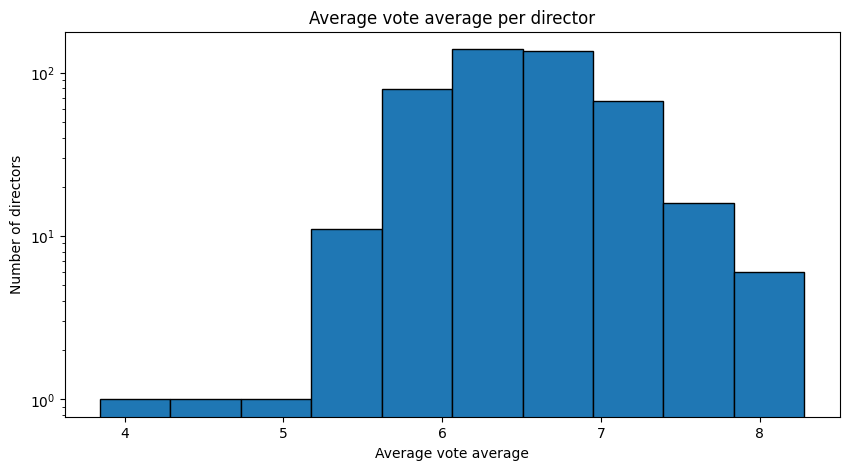

In [56]:
# plot the average vote average per director
plt.figure(figsize=(10, 5))
plt.hist(director_avg_vote_average, edgecolor='black', log=True)
plt.xlabel('Average vote average')
plt.ylabel('Number of directors')
plt.title('Average vote average per director')
plt.show()

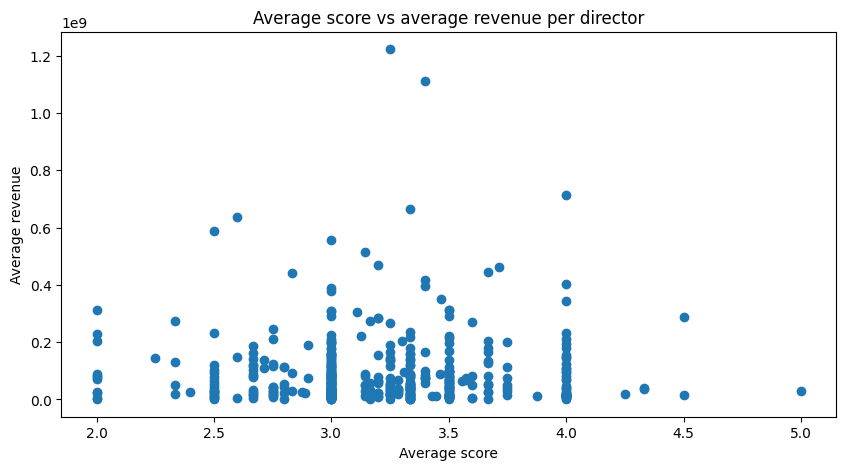

In [80]:
# analyze the correlation between the average score and the average revenue per director
plt.figure(figsize=(10, 5))
x_values = director_avg_score.index
plt.scatter(director_avg_score, director_avg_revenue[x_values])
plt.xlabel('Average score')
plt.ylabel('Average revenue')
plt.title('Average score vs average revenue per director')
plt.show()

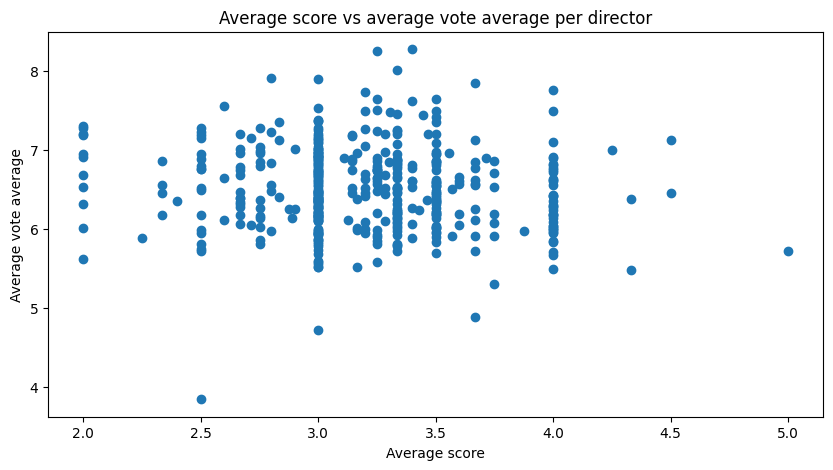

In [81]:
# analyze the correlation between the average score and the average vote average per director
plt.figure(figsize=(10, 5))
x_values = director_avg_score.index
plt.scatter(director_avg_score, director_avg_vote_average[x_values])
plt.xlabel('Average score')
plt.ylabel('Average vote average')
plt.title('Average score vs average vote average per director')
plt.show()

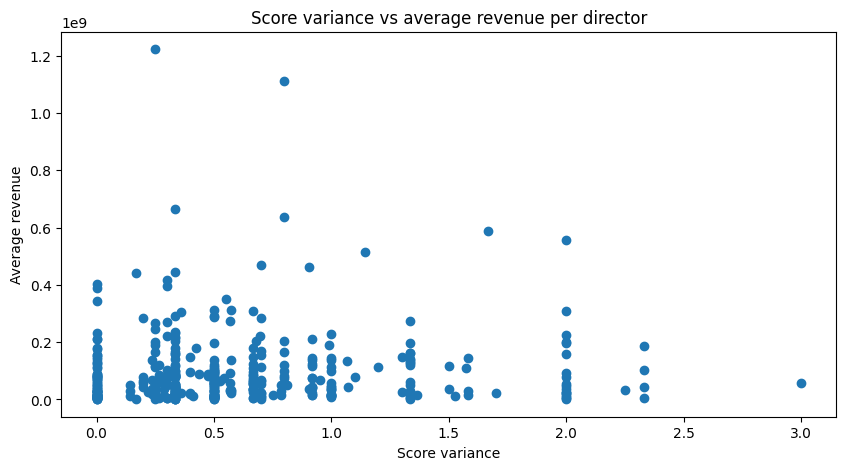

In [84]:
# analyze the correlation between the score variance and the average revenue per director
plt.figure(figsize=(10, 5))
x_values = director_score_variance.index
plt.scatter(director_score_variance, director_avg_revenue[x_values])
plt.xlabel('Score variance')
plt.ylabel('Average revenue')
plt.title('Score variance vs average revenue per director')
plt.show()

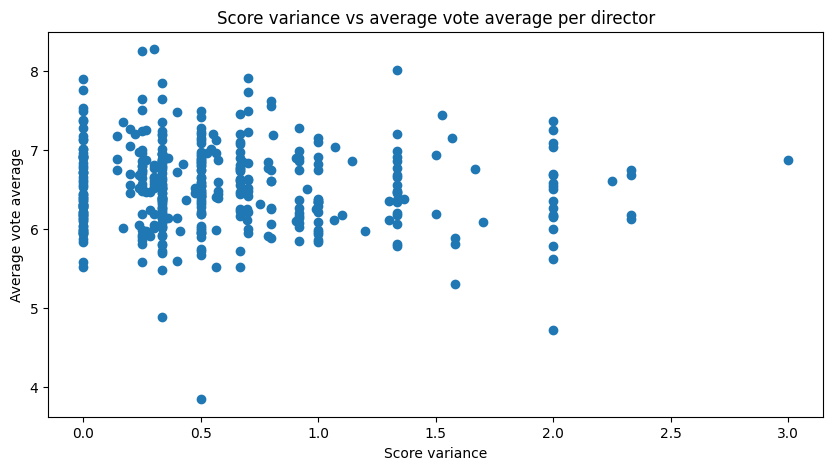

In [85]:
# analyze the correlation between the score variance and the average vote average per director
plt.figure(figsize=(10, 5))
x_values = director_score_variance.index
plt.scatter(director_score_variance, director_avg_vote_average[x_values])
plt.xlabel('Score variance')
plt.ylabel('Average vote average')
plt.title('Score variance vs average vote average per director')
plt.show()

In [86]:
# use t test to check if the average score is significantly different between directors with high and low revenue
from scipy.stats import ttest_ind

high_revenue_directors = director_avg_revenue[director_avg_revenue > 0.2e9].index
low_revenue_directors = director_avg_revenue[director_avg_revenue < 0.2e9].index

high_revenue_director_avg_score = director_avg_score[high_revenue_directors].dropna()
low_revenue_director_avg_score = director_avg_score[low_revenue_directors].dropna()

t_stat, p_value = ttest_ind(high_revenue_director_avg_score, low_revenue_director_avg_score)
print('t stat:', t_stat)
print('p value:', p_value)

if p_value < 0.05:
    print('The average score is significantly different between directors with high and low revenue')
else:
    print('The average score is not significantly different between directors with high and low revenue')


t stat: 0.19807215385696594
p value: 0.8430792653904904
The average score is not significantly different between directors with high and low revenue


In [87]:
# use t test to check if the average score is significantly different between directors with high and low vote average

high_vote_average_directors = director_avg_vote_average[director_avg_vote_average > 7].index
low_vote_average_directors = director_avg_vote_average[director_avg_vote_average < 7].index

high_vote_average_director_avg_score = director_avg_score[high_vote_average_directors].dropna()
low_vote_average_director_avg_score = director_avg_score[low_vote_average_directors].dropna()

t_stat, p_value = ttest_ind(high_vote_average_director_avg_score, low_vote_average_director_avg_score)
print('t stat:', t_stat)
print('p value:', p_value)

if p_value < 0.05:
    print('The average score is significantly different between directors with high and low vote average')
else:
    print('The average score is not significantly different between directors with high and low vote average')

t stat: -1.8992327608720196
p value: 0.05818174321154186
The average score is not significantly different between directors with high and low vote average


In [88]:
# use t test to check if the score variance is significantly different between directors with high and low revenue

high_revenue_director_score_variance = director_score_variance[high_revenue_directors].dropna()
low_revenue_director_score_variance = director_score_variance[low_revenue_directors].dropna()

t_stat, p_value = ttest_ind(high_revenue_director_score_variance, low_revenue_director_score_variance)
print('t stat:', t_stat)
print('p value:', p_value)

if p_value < 0.05:
    print('The score variance is significantly different between directors with high and low revenue')
else:
    print('The score variance is not significantly different between directors with high and low revenue')

t stat: 0.1341571481603897
p value: 0.8933442997805028
The score variance is not significantly different between directors with high and low revenue


In [89]:
# use t test to check if the score variance is significantly different between directors with high and low vote average

high_vote_average_director_score_variance = director_score_variance[high_vote_average_directors].dropna()
low_vote_average_director_score_variance = director_score_variance[low_vote_average_directors].dropna()

t_stat, p_value = ttest_ind(high_vote_average_director_score_variance, low_vote_average_director_score_variance)
print('t stat:', t_stat)
print('p value:', p_value)

if p_value < 0.05:
    print('The score variance is significantly different between directors with high and low vote average')
else:
    print('The score variance is not significantly different between directors with high and low vote average')

t stat: -0.6690443258661061
p value: 0.5038446635758776
The score variance is not significantly different between directors with high and low vote average
